In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [49]:
cars = pd.read_csv("car_price_dataset.csv")
cars

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [50]:
cars.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

Features include (x): Brand (c), Model (c), Year (c), Engine_Size (n), Fuel_Type (c), Transmission (c), Mileage (n), Doors (n), Owner_Count (n)

Target Columns for Prediction (y): Price (n)

Since target is numerical we want to use a regressive model for prediction

<Axes: xlabel='Year', ylabel='Price'>

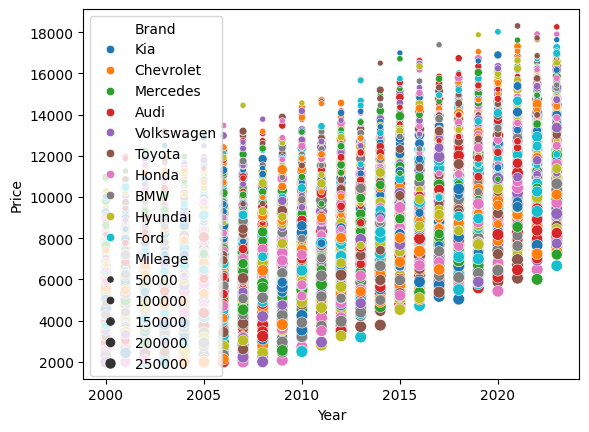

In [51]:
# Test correlation between year and price of a car
# Also comparing mileage and Brand
sns.scatterplot(data=cars, x="Year", y="Price", hue="Brand", size="Mileage")

From this graph we can see that the largest point tend to be on the lower price side showing that more mileage tend to result in a lower overall price of the vechicle. Also we see a scatter of points from of all diferent colors showing a mixture of brands with all different prices and years. A slight upward slope incicates a positive relationship between The year and Price.

In [97]:
# Data Cleaning/Assignment
cars = pd.read_csv("car_price_dataset.csv")
cat_car = pd.get_dummies(cars[['Brand', 'Model', 'Transmission', 'Fuel_Type']])
cars = cars.drop(['Brand', 'Model', 'Transmission', 'Fuel_Type'], axis=1)
cars = cars.join(cat_car)

x = cars.drop('Price', axis=1)
# Using all var as features besides price

y = cars["Price"]
# target

# Assign training and testing split with .8, .2 sizes 
# use Random state as 40 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [112]:
# Create model
rfr = RandomForestRegressor(max_depth=10, random_state=30, n_estimators=500)

# Train data
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [111]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", pow(mse, .5))

Mean Squared Error: 155602.29791793902
Root Mean Squared Error 394.4645711821773
